# Lecture 13 -- Gradient Descent

In [1]:
import numpy as np
import numpy.matlib as mat
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib

np.random.seed(0)

### Generate training data

In [2]:
n = 50
p = 1
# s = np.zeros((3, 2))
# print(s)
X = np.array(np.random.rand(n, p))
w_true = np.array([0.7])
y = X@w_true
def squared_loss(w):
    return la.norm(y[:,np.newaxis]-X@w, axis=0)**2

## Squared-error loss

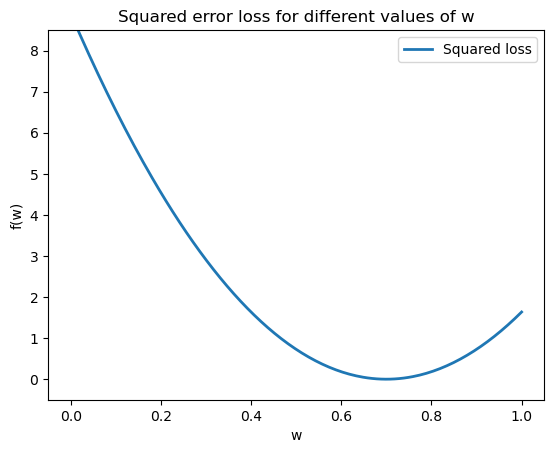

In [3]:
N = 200
# w = np.reshape(np.matrix(np.linspace(0,1,N)),(p,N))
# f = np.square(la.norm(mat.repmat(y,1,N) - X@w,2,0))
w = np.linspace(0,1,N).reshape(p, N)
f = la.norm(y[:,np.newaxis]-X@w, axis=0)**2

plt.plot(w.flatten(), f, linewidth=2, label="Squared loss")
plt.title('Squared error loss for different values of w')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.ylim([-.5,8.5])
plt.legend()
plt.show()

## First gradient
Initialize at $w_1=0.2$.

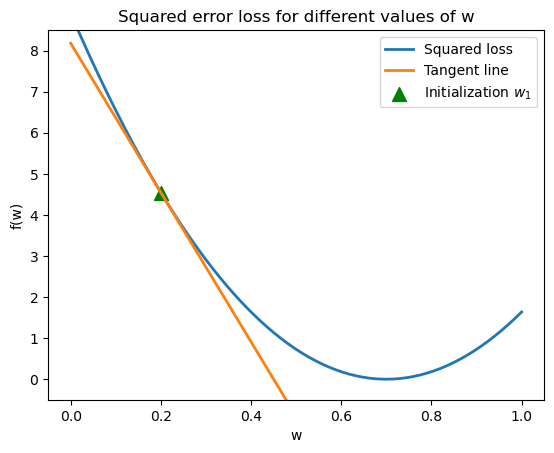

In [4]:
w_1 = np.array([0.2])
f_1 = la.norm(y-X@w_1)**2

gradf_1 = 2*X.T@(X@w_1-y) # also = -2*X.T @ (y-X@w_1)

tangent_1 = f_1 + gradf_1@(w-w_1)

fig, ax = plt.subplots()
ax.plot(w.T, f, linewidth=2, label="Squared loss")
ax.plot(w.T, tangent_1.T, linewidth=2, label="Tangent line")
ax.scatter(w_1, f_1, s=100, marker='^', color="green", label="Initialization $w_1$")
ax.set_title('Squared error loss for different values of w')
ax.set_xlabel('w')
ax.set_ylabel('f(w)')
ax.set_ylim([-.5,8.5])
ax.legend()
plt.show()

## First gradient step

grad f(w_1): [-18.17675734]


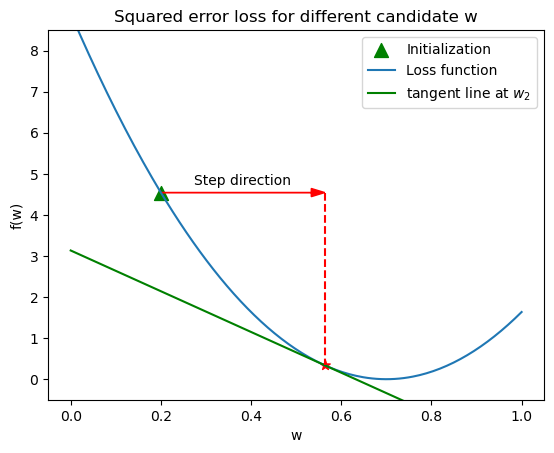

In [5]:
tau = .02 # step_size
w_2 = w_1 - tau*gradf_1
print(f"grad f(w_1): {gradf_1}")

f_2 = la.norm(y-X@w_2)**2

gradf_2 = 2*X.T@(X@w_2-y)
tangent_2 = f_2 + gradf_2@(w-w_2)

fig, ax = plt.subplots(1)
plt.scatter(w_1, f_1, s=100, marker='^', color="green", label="Initialization")
ax.plot(w.T, f, label="Loss function")
ax.plot(w.T, tangent_2.T, color="green", label="tangent line at $w_2$")
ax.scatter(w_2,f_2, s=50, marker="*", color="red")
ax.annotate("Step direction", xy=(0.5*(w_1+w_2).item(), 0.2+f_1), ha="center")
# arrow = ax.annotate("", xy=((w_2).item(), f_1), xytext=(w_1.item(), f_1),
#             arrowprops=dict(arrowstyle="->", color="red"), label="step")
ax.arrow(
    w_1.item(), f_1, (w_2-w_1).item()-0.03, 0,
    color="red", head_length=0.03, head_width=0.2)
ax.plot((w_2.item(), w_2.item()), (f_1, f_2), linestyle="dashed", color="red")
ax.set_title("Squared error loss for different candidate w")
ax.set_xlabel("w")
ax.set_ylabel("f(w)")
ax.set_ylim([-.5,8.5])
ax.legend(loc="upper right")
plt.show()

Note that the step takes place in 1D here to match the space that $w$ lives in. So, sometimes pictures showing the gradient step also affecting the function value (such as the ones below) could be slightly misleading to geometric intuition because the step does not take place in $y$-space.

## Multiple iterations of gradient descent

The steps could overshoot the target point but at least get closer.

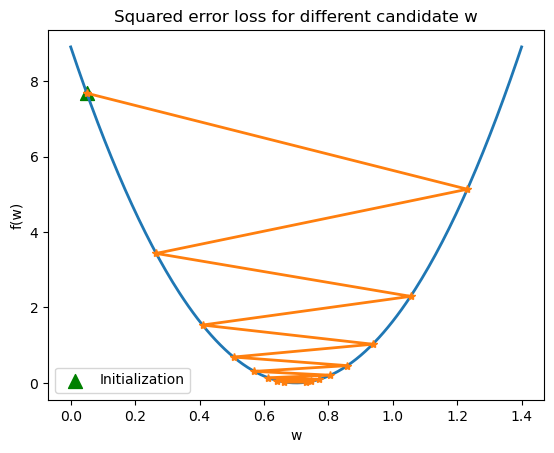

In [6]:
tau = .05 # larger step size this time
max_iter = 15
w_ext = np.linspace(0, 1.4, N).reshape(p, N)
f_ext = squared_loss(w_ext)

w_hat = np.zeros((max_iter+1,1))
f_hat = np.zeros((max_iter+1,1))

# Initialize to w=0.05
w_hat[0] = 0.05
f_hat[0] = la.norm(y-X@w_hat[0])**2

for k in range(max_iter):
    gradf = 2*X.T@(X@w_hat[k]-y)
    w_hat[k+1] = w_hat[k] - tau*gradf
    f_hat[k+1] = la.norm(y-X@w_hat[k+1])**2

fig, ax = plt.subplots(1)
ax.plot(w_ext.T, f_ext, w_hat,f_hat,'-*',linewidth=2)
ax.scatter(w_hat[0], f_hat[0], s=100, marker="^", color='green', label="Initialization")
ax.set_title('Squared error loss for different candidate w')
ax.set_xlabel('w')
ax.set_ylabel('f(w)')
ax.legend()
plt.show()

In this example, the step size is a bit larger, and we end up overshooting the minimum. However, this is not the worst as we are still getting closer to the minimum. Still, a smaller step size could improve convergence.

## Gradient Descent can diverge if the step size is too large

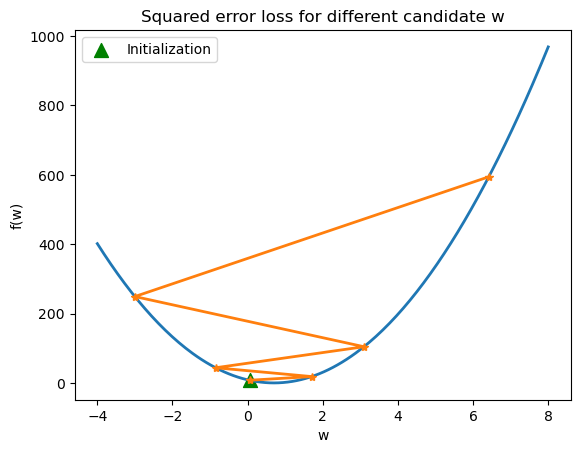

In [7]:
tau = .07 # even larger step size this time
max_iter = 5
w_ext2 = np.linspace(-4, 8, N).reshape(p, N)
f_ext2 = squared_loss(w_ext2)

w_hat = np.zeros((max_iter+1,1))
f_hat = np.zeros((max_iter+1,1))

# Initialize to w=0.05
w_hat[0] = 0.05
f_hat[0] = la.norm(y-X@w_hat[0])**2

for k in range(max_iter):
    gradf = 2*X.T@(X@w_hat[k]-y)
    w_hat[k+1] = w_hat[k] - tau*gradf
    f_hat[k+1] = la.norm(y-X@w_hat[k+1])**2

fig, ax = plt.subplots(1)
ax.plot(w_ext2.T, f_ext2, w_hat,f_hat,'-*',linewidth=2)
ax.scatter(w_hat[0], f_hat[0], s=100, marker="^", color='green', label="Initialization")
ax.set_title('Squared error loss for different candidate w')
ax.set_xlabel('w')
ax.set_ylabel('f(w)')
ax.legend()
plt.show()

In this example, the steps are bringing us farther from the minimum! This is why it is important not to choose a step size that is too large.

In general, the optimal step size would depend on the function, and it can be tricky to find good values for irregular loss landscapes. So, it is common to set a relatively low initial step size and to adjust as necessary.

## Now with 2D features

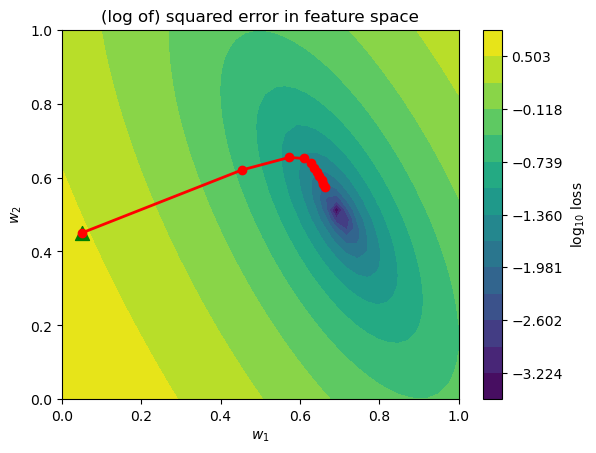

In [8]:
n = 20
p = 2
X = np.array(np.random.rand(n, p))

# w_true = np.array([0.7,0.5]).reshape(2,1)
w_true = np.array([0.7,0.5])
y = X@w_true


N = 40
w1_grid, w2_grid = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
w_grid = np.array([w1_grid.flatten(),w2_grid.flatten()])

# f = np.square(la.norm(mat.repmat(y,1,N**2) - X@w,2,0))
f = np.square(la.norm(y[:, np.newaxis] - X@w_grid, axis=0))
f2 = f.reshape(N, N)

tau = .04
max_iter = 10

w_hat = np.zeros((p, max_iter+1))
w_hat[:, 0] = np.array([0.05,.45])
f_hat = np.zeros((max_iter+1,1))
f_hat[0] = la.norm(y-X@w_hat[:,0])**2

for k in range(max_iter):
    gradf = 2*X.T@(X@w_hat[:,k]-y)
    w_hat[:,k+1] = w_hat[:,k] - tau*gradf
    f_hat[k+1] = la.norm(y-X@w_hat[:,k+1])**2
    
fig, ax = plt.subplots(1)

# All of these work, although the last color level setting
# gives the best contrast close to the minimum point
# plt.imshow(np.log(f2+1), extent=[0, 1, 0, 1], origin='lower')
# plt.pcolormesh(w1, w2, np.log(f2+1))
# plt.contourf(w1, w2, np.log(f2+1), levels=40)

color_levels=np.linspace(np.log10(f2.min()), np.log10(f2.max()), 15)
cb = ax.contourf(w1_grid, w2_grid, np.log10(f2), levels=color_levels)
fig.colorbar(cb, label="$\log_{10}$ loss")

ax.plot(w_hat[0,:].T,w_hat[1,:].T,'or-',linewidth=2)
ax.scatter(*w_hat[:2,0], s=100, marker="^", color='green', label="Initialization")
ax.set_title('(log of) squared error in feature space')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
plt.show()